<a href="https://colab.research.google.com/github/aysedata/DEEP-LEARNING/blob/main/DL_Lab1_(Assignmet_1_Solution_Classification_Churn_Modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 1 (ANN) <br><br>Assignment-1 Solution<br><br>Churn Prediction for Bank Customer<br><h1>

We have a dataset with details of a bank's customers, and the target variable is a binary variable that reflects whether the customer has left the bank (closed his/her account) or remains a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

---
---

## Import  libraries & data

In [ ]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1
2,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1
4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0


## Exploratory Data Analysis and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.isnull().sum().any() # No missing values

False

In [ ]:
df.duplicated().sum() # No duplicates

0

In [ ]:
df.describe().T  # summary statistics

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,15690940.6,71936.2,15565701.0,15628528.2,15690738.0,15753233.8,15815690.0
CreditScore,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,2.9,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76485.9,62397.4,0.0,0.0,97198.5,127644.2,250898.1
NumOfProducts,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.2,57510.5,11.6,51002.1,100193.9,149388.2,199992.5
Exited,10000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

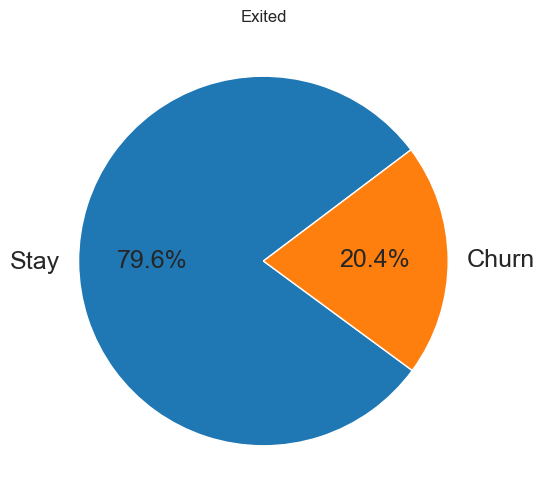

In [ ]:
df.Exited.value_counts().plot.pie(autopct='%1.1f%%', 
                                  startangle=37, 
                                  fontsize=18, 
                                  labels=["Stay","Churn"], 
                                  ylabel='',
                                  title='Exited');

In [ ]:
#imbalance stratify, smote, weight balance yapabilirsin.

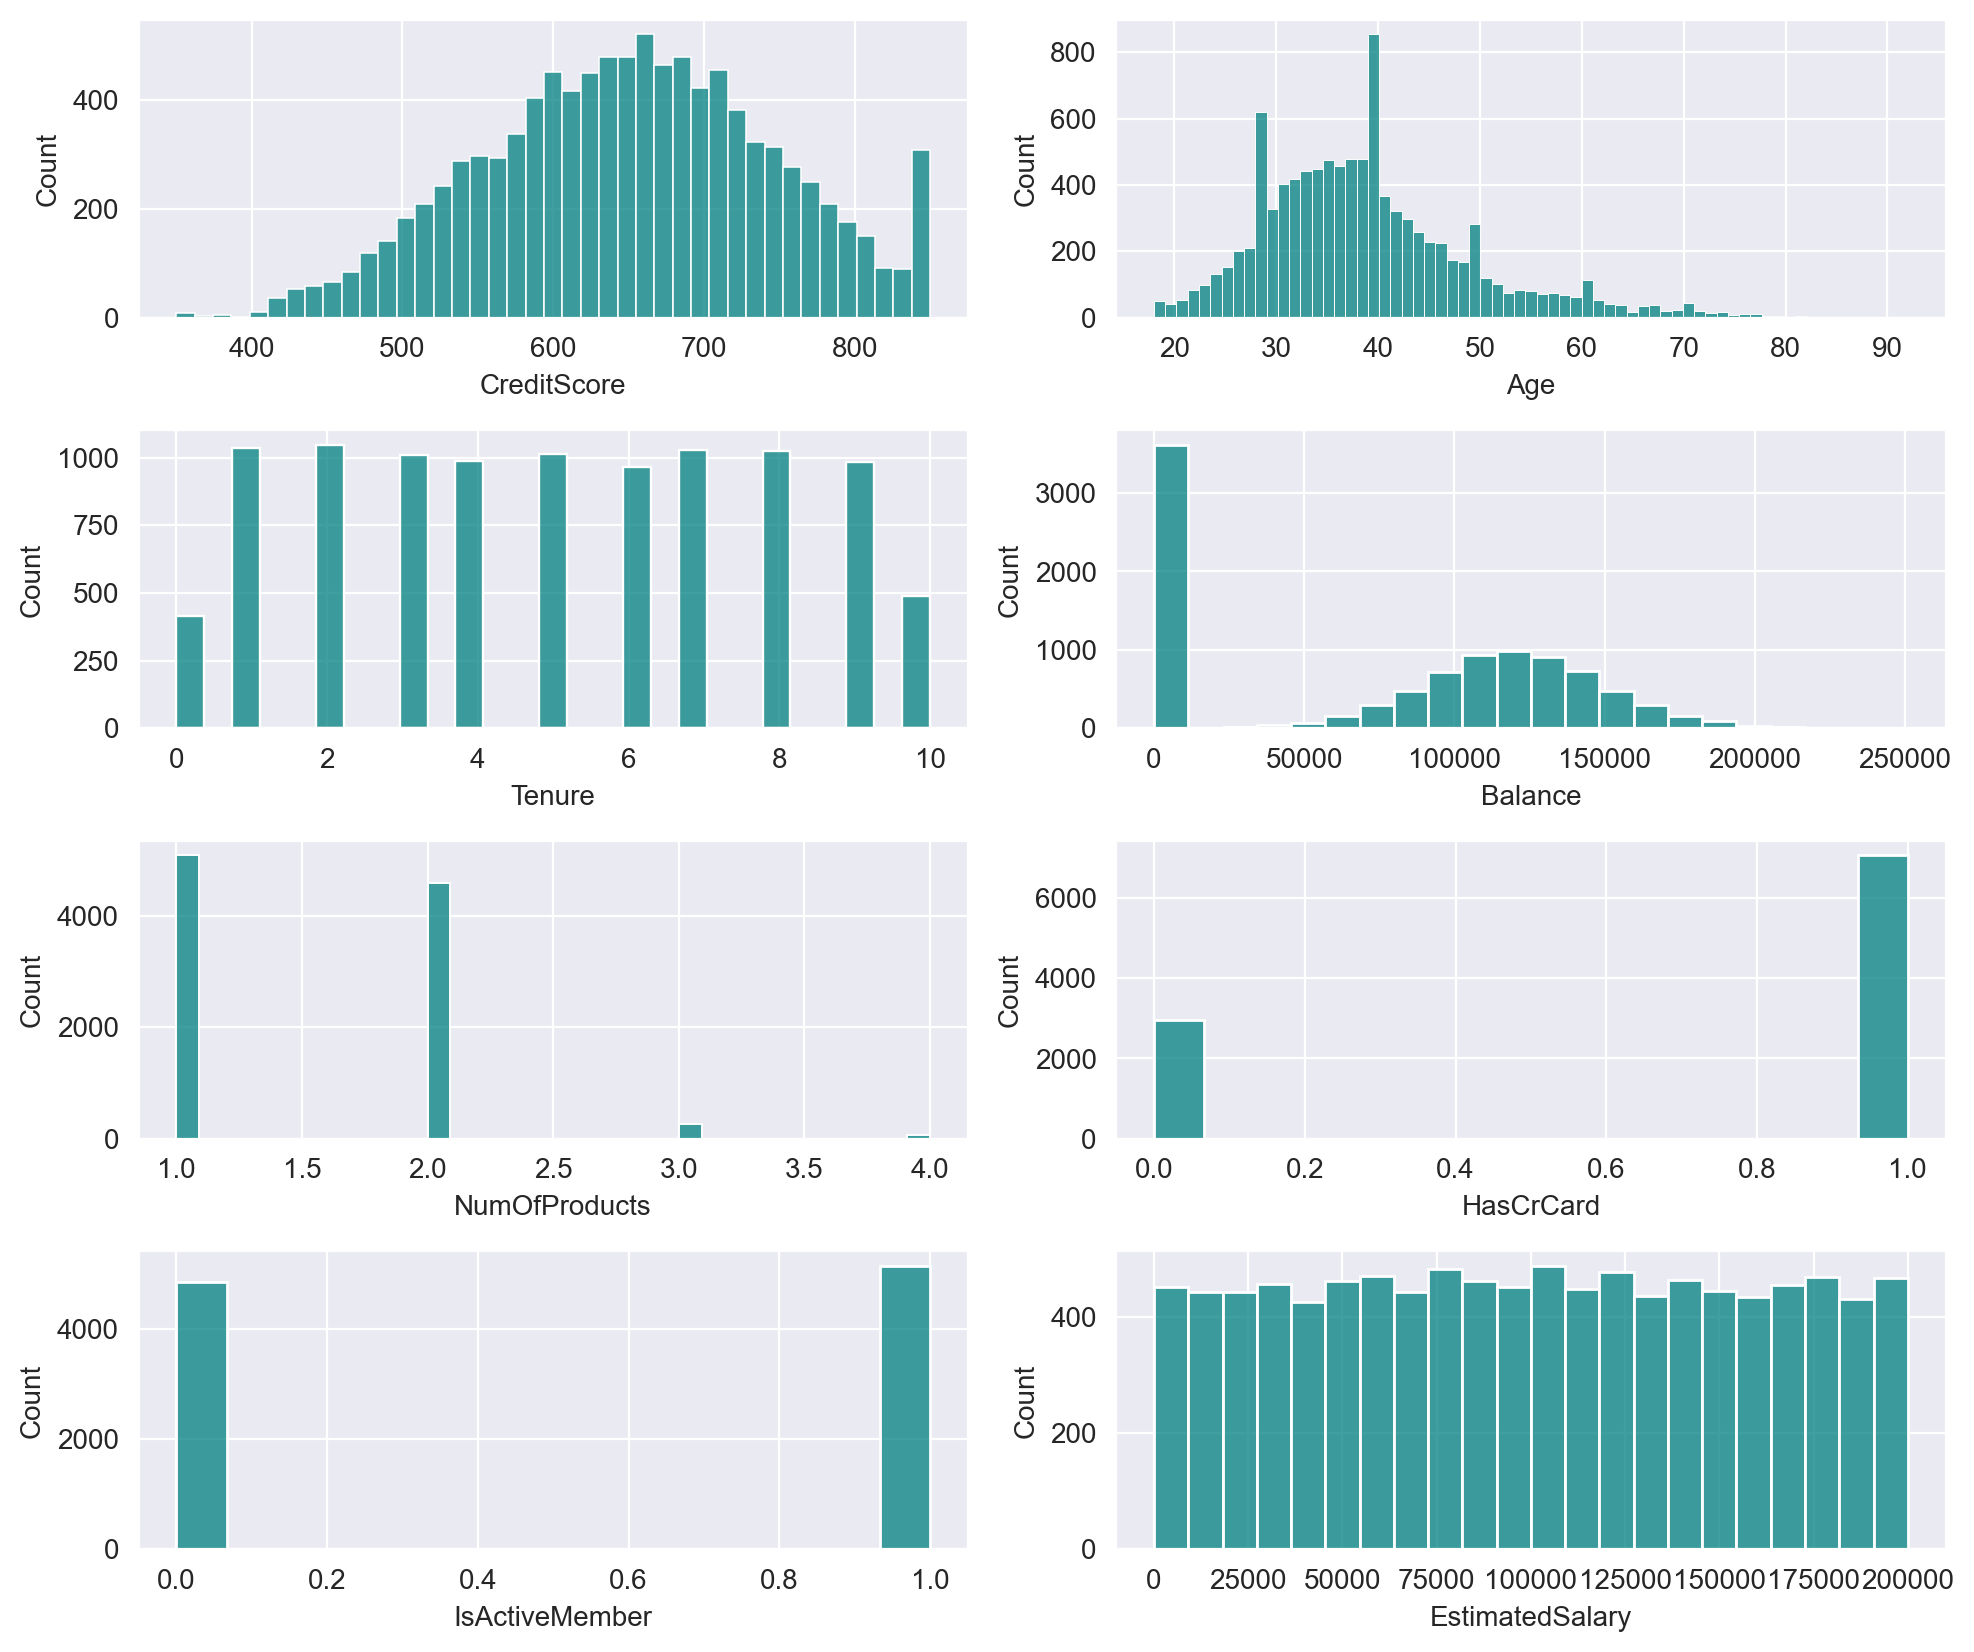

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="object").columns[:-1]):
        plt.subplot(5,2,i+1)
        sns.histplot(df[col], color="teal", )
plt.tight_layout();

In [ ]:
#estimated ve tenure uniform dagilmis, digerleri normal distribution.

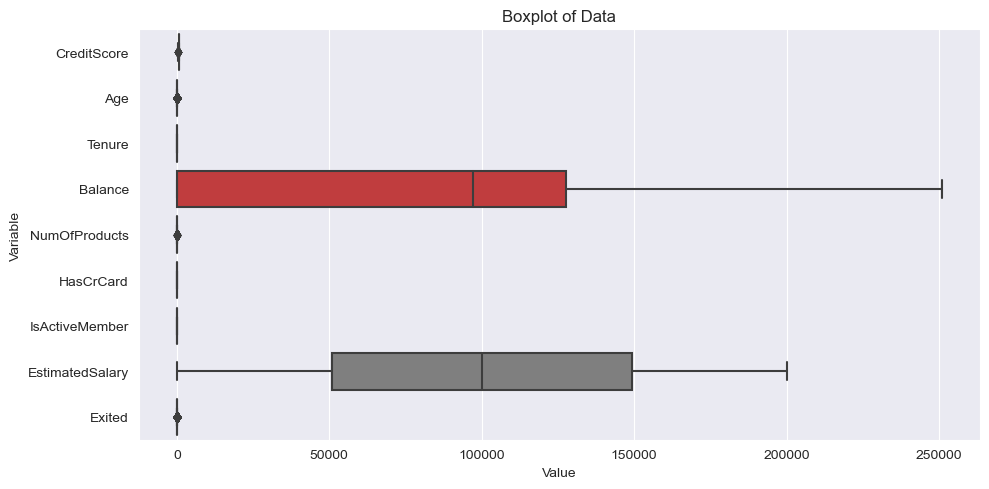

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="h", linewidth=1.5)
plt.title("Boxplot of Data")
plt.ylabel("Variable")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

In [ ]:
def column_box(col):
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df,
                y=df[col],
                x=df["Exited"],
                palette='deep',
                saturation=1);


cols = df.select_dtypes(exclude="object").columns[:-1]
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfPr…

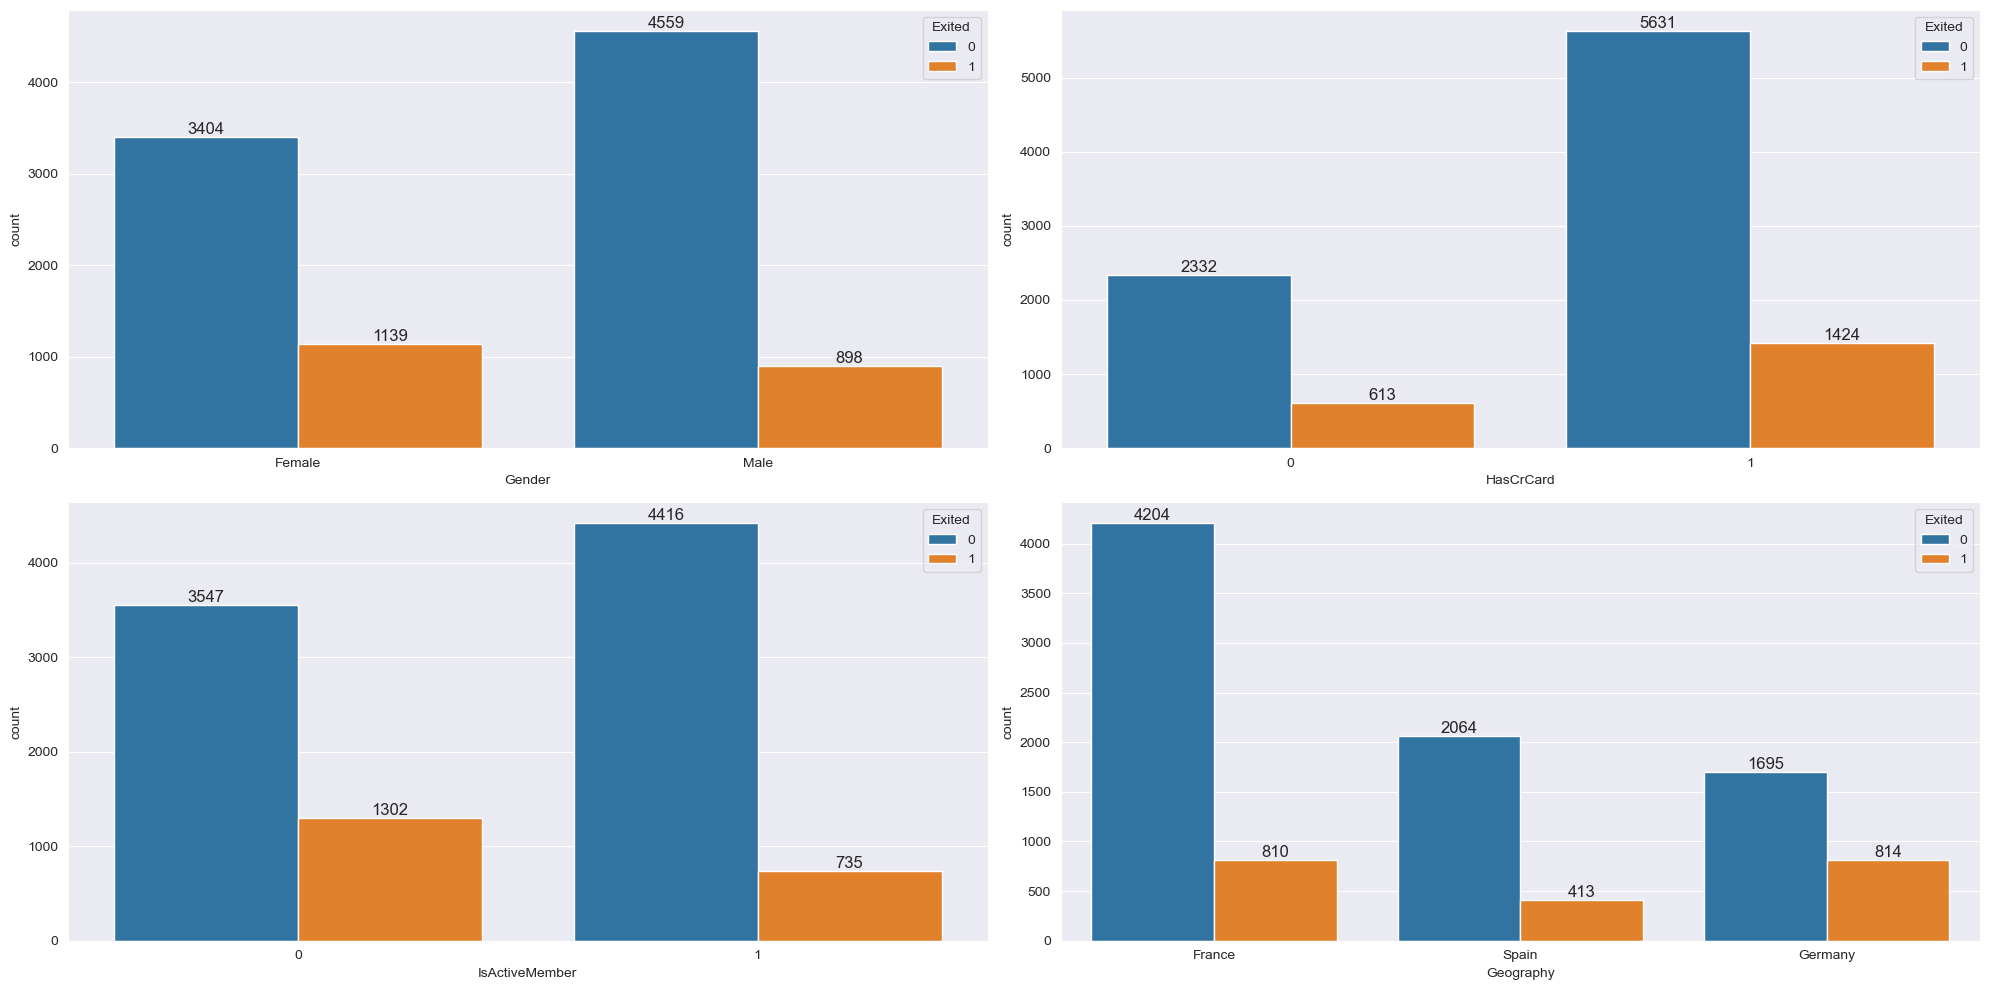

In [ ]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(20, 10), dpi=400)
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data=df, x=i, hue="Exited")
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f', size=12)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

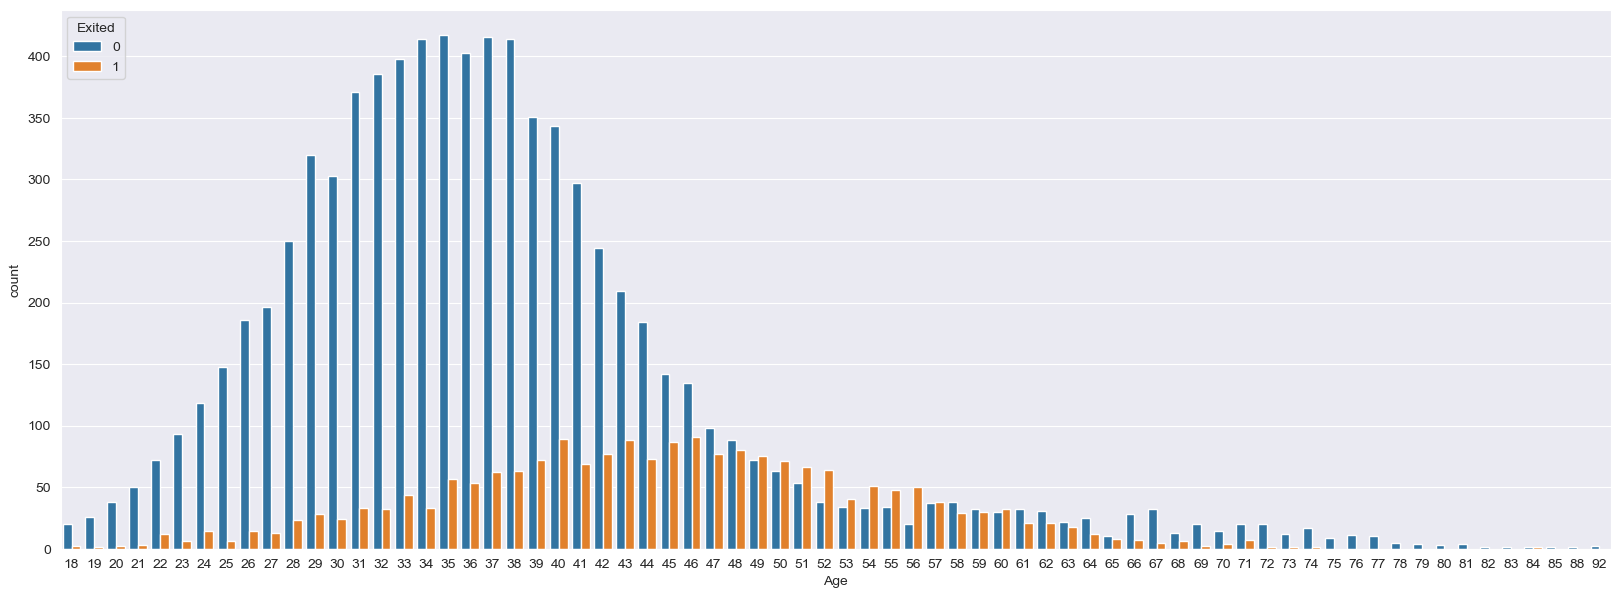

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited)

## Feature engineering

In [ ]:
df.CreditScore.describe()

count   10000.0
mean      650.5
std        96.7
min       350.0
25%       584.0
50%       652.0
75%       718.0
max       850.0
Name: CreditScore, dtype: float64

In [ ]:
def credit_transformer(x, y):
    """to prodduce a new value by using credit score and has credit card"""

    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [ ]:
customer_value = [
    credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)
]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [ ]:
df.insert(10, "customer_value", customer_value)

In [ ]:
df.customer_value

RowNumber
1        3
2        2
3        3
4        2
5        4
        ..
9996     4
9997     3
9998     2
9999     4
10000    4
Name: customer_value, Length: 10000, dtype: int64

<AxesSubplot:>

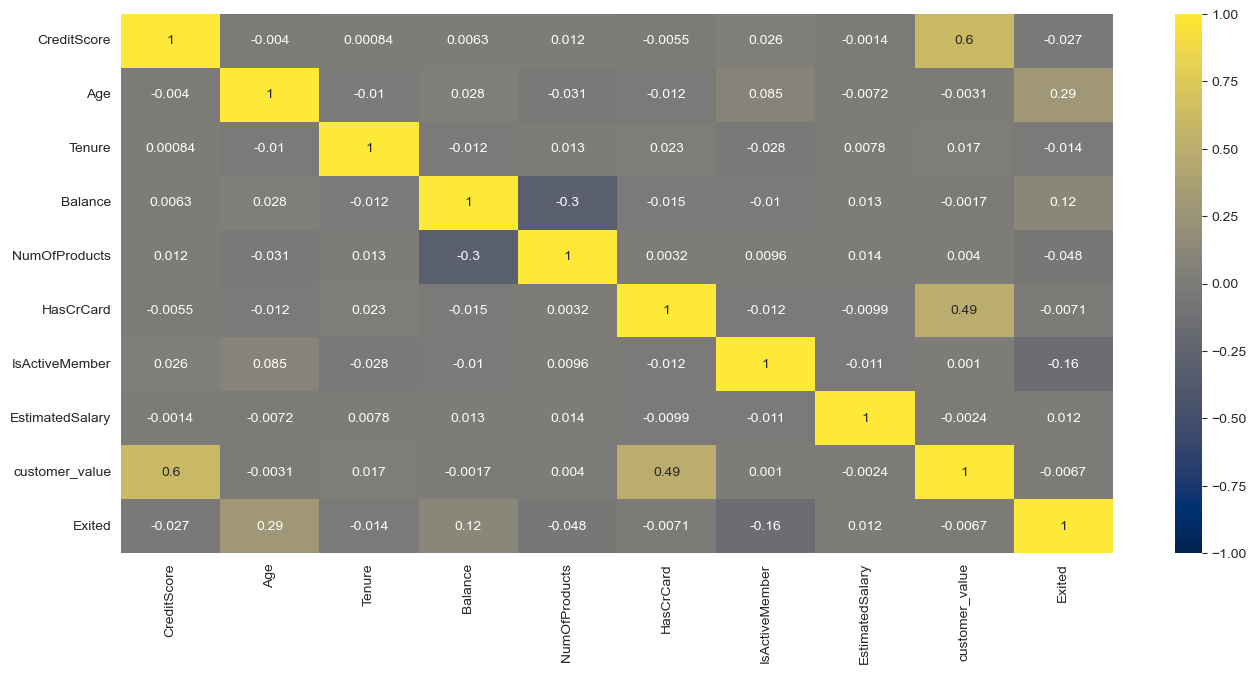

In [ ]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot=True, cmap='cividis', vmin=-1, vmax=1)

## Preprocessing of Data

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
#imbalance! stratify yap!

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [ ]:
#drop first ayni olan bir sutunu dusurur.
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        #drop="first", 
                        handle_unknown="ignore")

In [ ]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [ ]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [ ]:
#outlier varsa robust
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [ ]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

<span class="mark">How many hidden layers should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
How many hidden units should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
What is genetic algorithm? : https://www.researchgate.net/post/What_is_genetic_algorithm1
Genetic algorithm + neural networks: http://francky.me/doc/mrf2011-HEC-ISIR-ENS_en.pdf (chapter 2.2)</span>

### without class_weigth

In [ ]:
tf.random.set_seed(42) # for reproducibility

model = Sequential() # instantiate the model

model.add(Dense(16, activation="relu")) # add the input layer and the first hidden layer
model.add(Dense(8, activation="relu"))  # add the second hidden layer
model.add(Dense(1, activation="sigmoid")) # add the output layer

opt = Adam(lr=0.001) # optimizer 
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) # loss function and metrics

<span class="burk">The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network.</span>

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=8,
                           restore_best_weights=True)

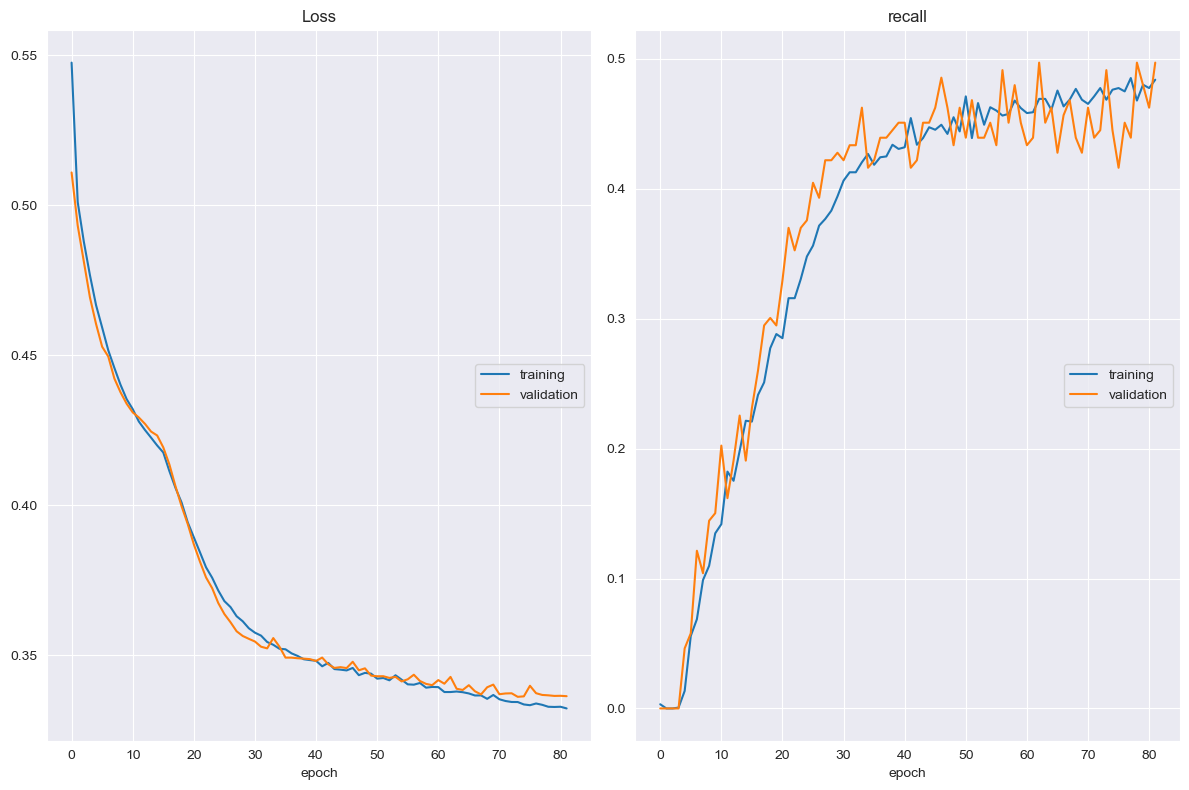

Loss
	training         	 (min:    0.332, max:    0.547, cur:    0.332)
	validation       	 (min:    0.336, max:    0.511, cur:    0.336)
recall
	training         	 (min:    0.000, max:    0.485, cur:    0.484)
	validation       	 (min:    0.000, max:    0.497, cur:    0.497)
60/60 [==============================] - 1s 11ms/step - loss: 0.3323 - recall: 0.4840 - val_loss: 0.3364 - val_recall: 0.4971
Epoch 00082: early stopping


In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()])

In [ ]:
# model.weights

In [ ]:
model.summary() # summary of the model, how many layers, how many nodes in each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

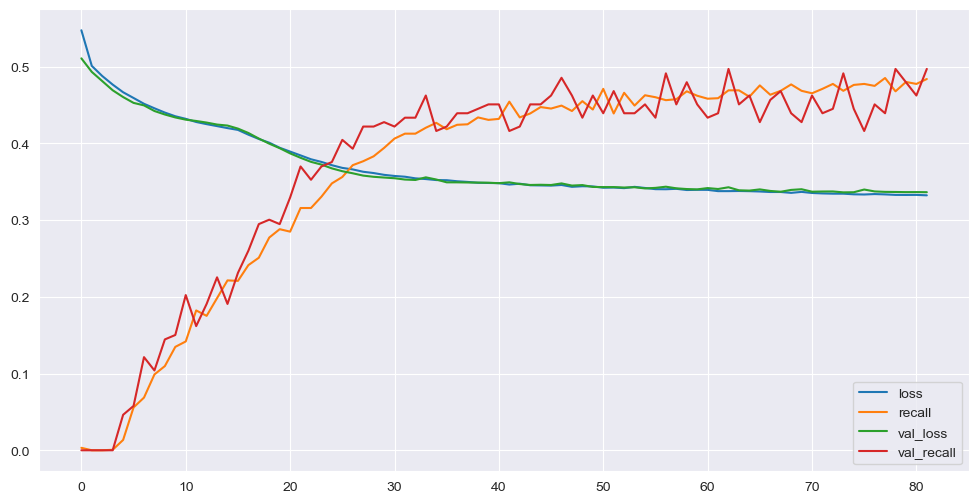

In [ ]:
# loss function history for each epoch
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > .5).astype(
    "int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1137   57]
 [ 157  149]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.72      0.49      0.58       306

    accuracy                           0.86      1500
   macro avg       0.80      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

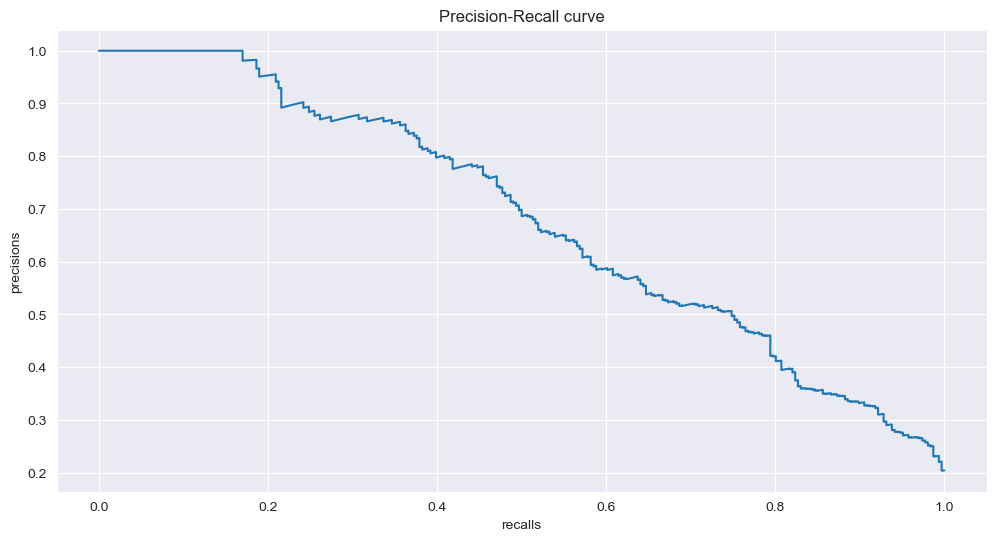

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.682068230692917

In [ ]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

### with class_weigth

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [ ]:
#imbalance icin
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

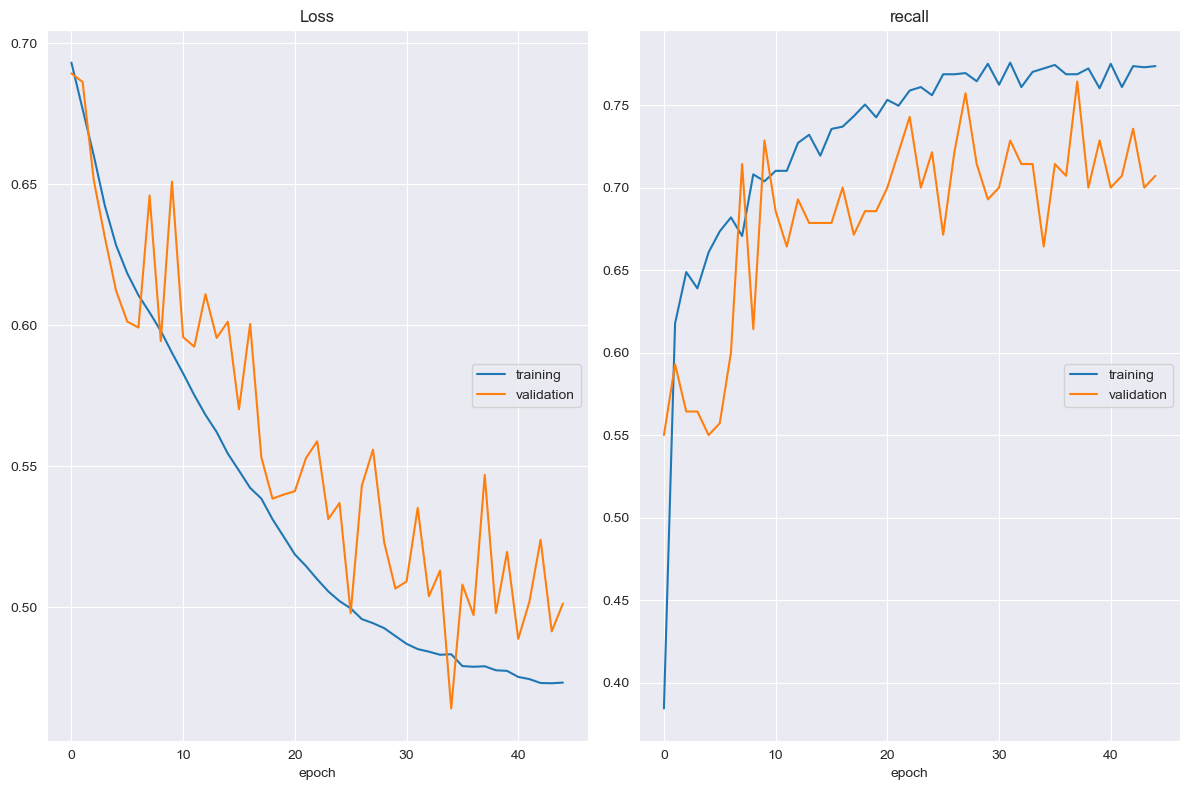

Loss
	training         	 (min:    0.473, max:    0.693, cur:    0.473)
	validation       	 (min:    0.464, max:    0.689, cur:    0.501)
recall
	training         	 (min:    0.384, max:    0.776, cur:    0.774)
	validation       	 (min:    0.550, max:    0.764, cur:    0.707)
54/54 [==============================] - 1s 12ms/step - loss: 0.4734 - recall: 0.7736 - val_loss: 0.5014 - val_recall: 0.7071
Epoch 00045: early stopping


In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

<AxesSubplot:>

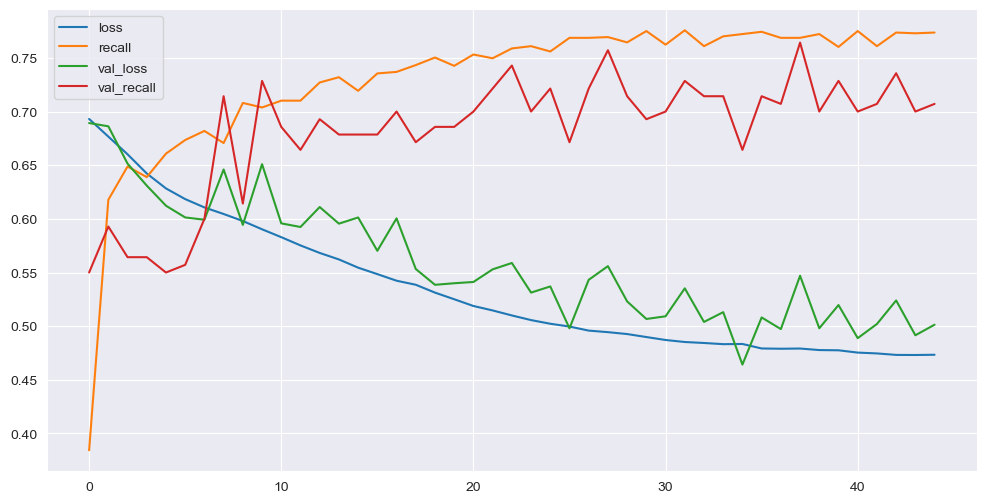

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[954 240]
 [ 94 212]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1194
           1       0.47      0.69      0.56       306

    accuracy                           0.78      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.82      0.78      0.79      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

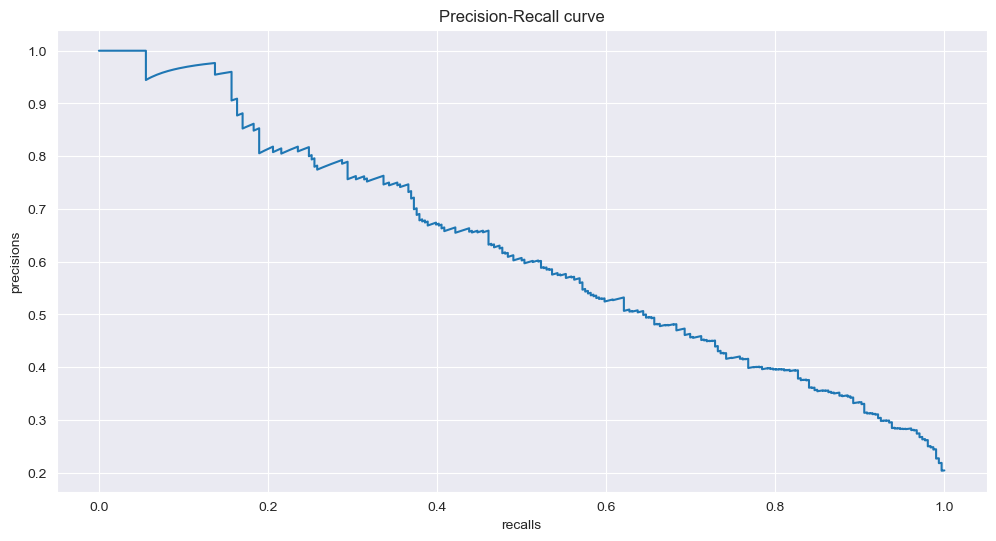

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.6214600837144155

In [ ]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## Optuna (Hyperparameter optimization tool)

https://medium.com/optuna/using-optuna-to-optimize-tensorflow-hyperparameters-57b6d4d316a2

![image.png](attachment:image.png)

In [ ]:
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [ ]:
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

In [ ]:
trial_metric = "Recall"
batch_size = 512


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_split=.1,
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

[I 2023-01-20 19:21:58,269] A new study created in memory with name: no-name-67ec9003-b9cf-4097-bee2-224679b096d1


Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


[I 2023-01-20 19:22:01,390] Trial 0 finished with value: 0.22875817120075226 and parameters: {'n_units1': 17, 'n_units2': 27, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 3.8012444267608834e-05, 'w0': 0.11324193555504358, 'w1': 0.4196268599463967}. Best is trial 0 with value: 0.22875817120075226.
[I 2023-01-20 19:22:17,540] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 11, 'n_units2': 69, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>, 'learning_rate': 1.092253436234149e-05, 'w0': 0.5759159653409713, 'w1': 0.016786632847312813}. Best is trial 0 with value: 0.22875817120075226.


Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


[I 2023-01-20 19:22:22,812] Trial 2 finished with value: 0.4542483687400818 and parameters: {'n_units1': 119, 'n_units2': 95, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.003133612426980633, 'w0': 1.6263188717105201, 'w1': 1.0336031130393302}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 14.
Epoch 00024: early stopping


[I 2023-01-20 19:22:27,443] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 126, 'n_units2': 63, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.025544171354908638, 'w0': 1.9372182375594886, 'w1': 0.010177747084840035}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


[I 2023-01-20 19:22:30,071] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 68, 'n_units2': 9, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0009145484270713188, 'w0': 0.03945351236525097, 'w1': 0.501675760258253}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 23.
Epoch 00033: early stopping


[I 2023-01-20 19:22:36,598] Trial 5 finished with value: 0.38562092185020447 and parameters: {'n_units1': 69, 'n_units2': 20, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.11403298489004175, 'w0': 0.1340887496586357, 'w1': 0.27116124382272566}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 8.
Epoch 00018: early stopping


[I 2023-01-20 19:22:40,077] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 90, 'n_units2': 57, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.011041939640951445, 'w0': 0.2696325166357328, 'w1': 0.03298279673754357}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 14.
Epoch 00024: early stopping


[I 2023-01-20 19:22:44,908] Trial 7 finished with value: 0.31699347496032715 and parameters: {'n_units1': 98, 'n_units2': 65, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.01631288574183392, 'w0': 0.16041183973676137, 'w1': 0.09222797716145113}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


[I 2023-01-20 19:22:47,377] Trial 8 finished with value: 0.09150326997041702 and parameters: {'n_units1': 112, 'n_units2': 109, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0059007657795499815, 'w0': 0.05114311496103388, 'w1': 0.5780156466355691}. Best is trial 2 with value: 0.4542483687400818.


Restoring model weights from the end of the best epoch: 20.
Epoch 00030: early stopping


[I 2023-01-20 19:22:52,951] Trial 9 finished with value: 0.5816993713378906 and parameters: {'n_units1': 123, 'n_units2': 60, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.001488496262439793, 'w0': 0.029523477907240653, 'w1': 0.1178292291899781}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


[I 2023-01-20 19:22:56,040] Trial 10 finished with value: 0.003267973894253373 and parameters: {'n_units1': 47, 'n_units2': 36, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0003402092409170418, 'w0': 0.012308256913224838, 'w1': 4.282420369852116}. Best is trial 9 with value: 0.5816993713378906.
[I 2023-01-20 19:23:13,007] Trial 11 finished with value: 0.29738563299179077 and parameters: {'n_units1': 127, 'n_units2': 100, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0002489514160585095, 'w0': 3.1771578009842623, 'w1': 2.412686902382012}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 33.
Epoch 00043: early stopping


[I 2023-01-20 19:23:21,036] Trial 12 finished with value: 0.27450981736183167 and parameters: {'n_units1': 101, 'n_units2': 92, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.002208688425422668, 'w0': 0.6122466757960449, 'w1': 0.09756105775812964}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 58.
Epoch 00068: early stopping


[I 2023-01-20 19:23:33,023] Trial 13 finished with value: 0.0 and parameters: {'n_units1': 81, 'n_units2': 81, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0019304437188933014, 'w0': 0.010999147279079089, 'w1': 1.313027070850017}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 4.
Epoch 00014: early stopping


[I 2023-01-20 19:23:36,294] Trial 14 finished with value: 0.0 and parameters: {'n_units1': 112, 'n_units2': 122, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.00017268791248992385, 'w0': 1.2024858080696235, 'w1': 0.11058117446106104}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


[I 2023-01-20 19:23:39,099] Trial 15 finished with value: 0.0 and parameters: {'n_units1': 36, 'n_units2': 41, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0007945122802431179, 'w0': 4.782110745853305, 'w1': 0.7802086215584999}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 23.
Epoch 00033: early stopping


[I 2023-01-20 19:23:45,687] Trial 16 finished with value: 0.516339898109436 and parameters: {'n_units1': 116, 'n_units2': 83, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.004946529307811101, 'w0': 0.03339830060286857, 'w1': 0.0437174294967382}. Best is trial 9 with value: 0.5816993713378906.
[I 2023-01-20 19:24:01,632] Trial 17 finished with value: 0.0 and parameters: {'n_units1': 103, 'n_units2': 49, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.05176399325753394, 'w0': 0.03141712186000564, 'w1': 0.02791651194571152}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 83.
Epoch 00093: early stopping


[I 2023-01-20 19:24:20,231] Trial 18 finished with value: 0.4901960790157318 and parameters: {'n_units1': 88, 'n_units2': 80, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 9.566005881709848e-05, 'w0': 0.023872198533239988, 'w1': 0.05644164066864696}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 20.
Epoch 00030: early stopping


[I 2023-01-20 19:24:25,899] Trial 19 finished with value: 0.45098039507865906 and parameters: {'n_units1': 44, 'n_units2': 76, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.004960099222657022, 'w0': 0.06724169284323236, 'w1': 0.1559600650159814}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 20.
Epoch 00030: early stopping


[I 2023-01-20 19:24:31,593] Trial 20 finished with value: 0.4313725531101227 and parameters: {'n_units1': 75, 'n_units2': 115, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.000579911181858748, 'w0': 0.021255929705397057, 'w1': 0.04824400034650824}. Best is trial 9 with value: 0.5816993713378906.
[I 2023-01-20 19:24:50,901] Trial 21 finished with value: 0.41503268480300903 and parameters: {'n_units1': 89, 'n_units2': 81, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 3.007680043903735e-05, 'w0': 0.023062461867589482, 'w1': 0.05871973594776813}. Best is trial 9 with value: 0.5816993713378906.


Restoring model weights from the end of the best epoch: 83.
Epoch 00093: early stopping


[I 2023-01-20 19:25:09,640] Trial 22 finished with value: 0.6111111044883728 and parameters: {'n_units1': 112, 'n_units2': 86, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 8.216467814738857e-05, 'w0': 0.0636430295707782, 'w1': 0.2030125133460237}. Best is trial 22 with value: 0.6111111044883728.


Restoring model weights from the end of the best epoch: 12.
Epoch 00022: early stopping


[I 2023-01-20 19:25:14,671] Trial 23 finished with value: 0.4869281053543091 and parameters: {'n_units1': 114, 'n_units2': 89, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00622570942351609, 'w0': 0.07607932083440513, 'w1': 0.20667678760234479}. Best is trial 22 with value: 0.6111111044883728.
[I 2023-01-20 19:25:33,928] Trial 24 finished with value: 0.28431373834609985 and parameters: {'n_units1': 122, 'n_units2': 103, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00011267753306125421, 'w0': 0.27885609047351084, 'w1': 0.2876700759829583}. Best is trial 22 with value: 0.6111111044883728.


{'n_units1': 112,
 'n_units2': 86,
 'optimizer': keras.optimizer_v2.nadam.Nadam,
 'learning_rate': 8.216467814738857e-05,
 'w0': 0.0636430295707782,
 'w1': 0.2030125133460237}

In [ ]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=512,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 42ms/step - loss: 0.0666 - recall: 0.9922 - val_loss: 0.7742 - val_recall: 0.9786
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0652 - recall: 0.9337 - val_loss: 0.7313 - val_recall: 0.8643
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0641 - recall: 0.7828 - val_loss: 0.6972 - val_recall: 0.6071
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0633 - recall: 0.6171 - val_loss: 0.6713 - val_recall: 0.4571
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0626 - recall: 0.4669 - val_loss: 0.6533 - val_recall: 0.3643
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0622 - recall: 0.4013 - val_loss: 0.6407 - val_recall: 0.3143
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0617 - recall: 0.3773 - val_loss: 0.6316 - val_recall: 0.3000
Epoch 8/100
14/14 [===============

14/14 [==============================] - 0s 15ms/step - loss: 0.0530 - recall: 0.6227 - val_loss: 0.5561 - val_recall: 0.5857
Epoch 61/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0529 - recall: 0.6269 - val_loss: 0.5545 - val_recall: 0.5857
Epoch 62/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0528 - recall: 0.6206 - val_loss: 0.5597 - val_recall: 0.6071
Epoch 63/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0527 - recall: 0.6403 - val_loss: 0.5556 - val_recall: 0.6000
Epoch 64/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0526 - recall: 0.6333 - val_loss: 0.5510 - val_recall: 0.5929
Epoch 65/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0525 - recall: 0.6241 - val_loss: 0.5523 - val_recall: 0.6071
Epoch 66/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0524 - recall: 0.6298 - val_loss: 0.5504 - val_recall: 0.6071
Epoch 67/100
14/14 [====================

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[933 261]
 [119 187]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1194
           1       0.42      0.61      0.50       306

    accuracy                           0.75      1500
   macro avg       0.65      0.70      0.66      1500
weighted avg       0.79      0.75      0.76      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

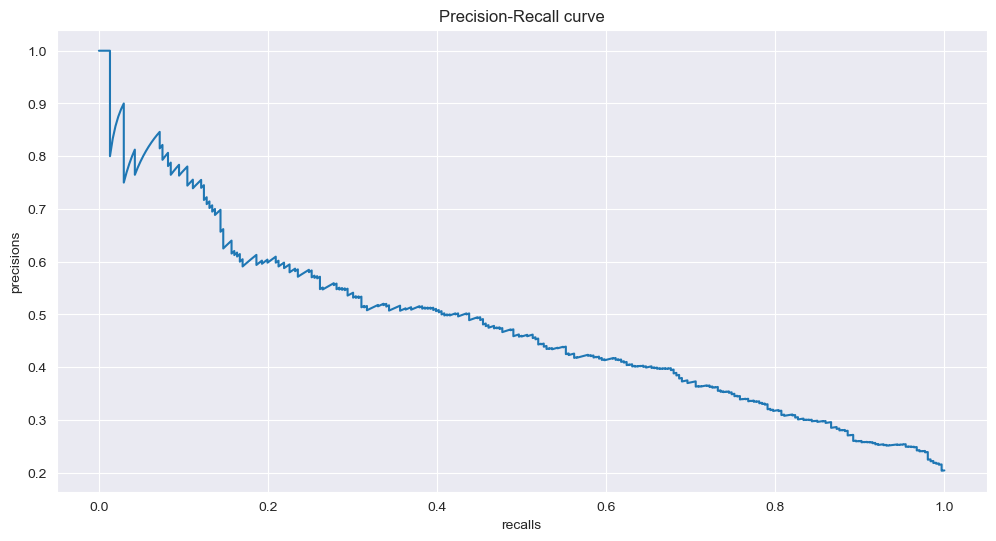

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score  

0.48014230163100097

In [ ]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

## Model Comparission

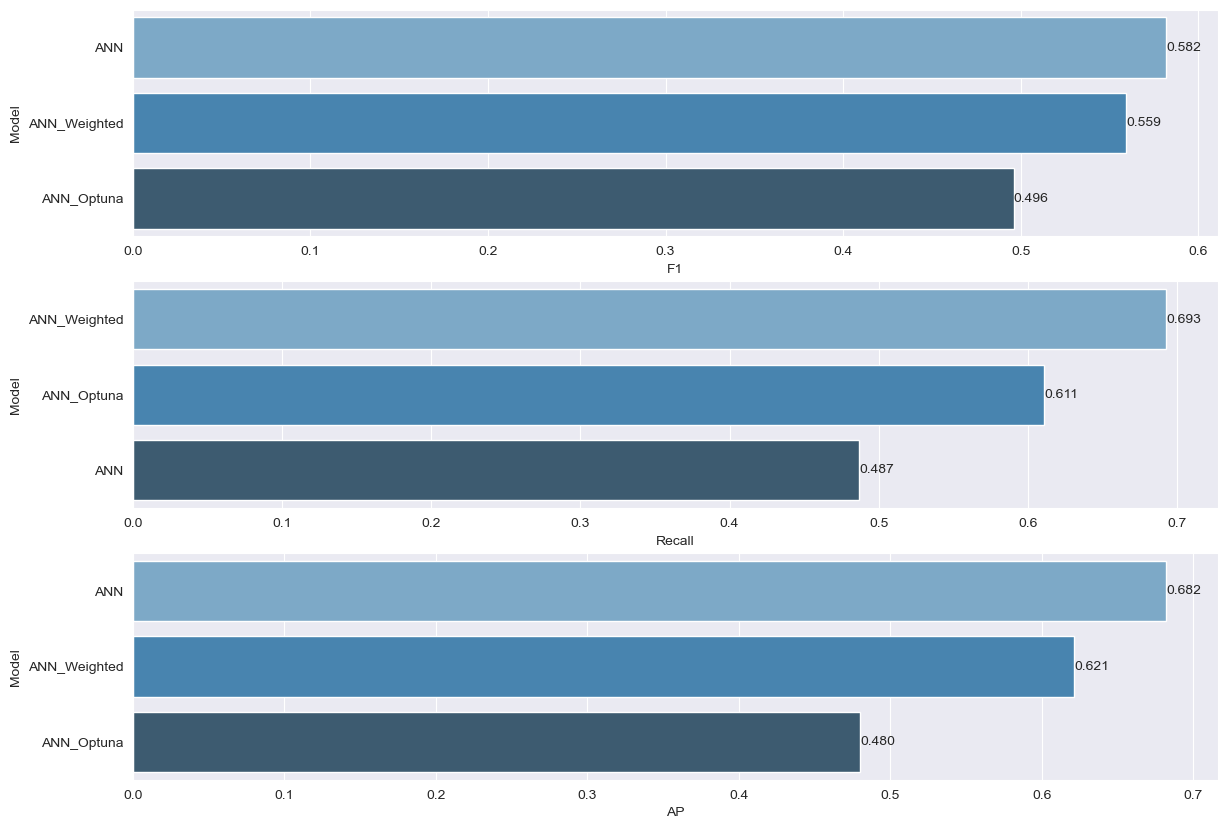

In [ ]:
compare = pd.DataFrame({
    "Model": ["ANN", "ANN_Weighted", "ANN_Optuna"],
    "F1": [non_weighted_f1, weighted_f1, optuna_weighted_f1],
    "Recall": [non_weighted_recall, weighted_recall, optuna_weighted_recall],
    "AP": [non_weighted_pre_score, weighted_pre_score, optuna_pre_score]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Final Model and Model Deployment

In [ ]:
import pickle # to save the model or scalling parameters

pickle.dump(col_transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", 'wb')) # to save the scaler


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [ ]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
study.best_params

{'n_units1': 112,
 'n_units2': 86,
 'optimizer': keras.optimizer_v2.nadam.Nadam,
 'learning_rate': 8.216467814738857e-05,
 'w0': 0.0636430295707782,
 'w1': 0.2030125133460237}

* balanced
- 'n_units1': 38,
- 'n_units2': 67,
- 'optimizer': keras.optimizer_v2.adam.Adam,
- 'learning_rate': 0.0021431406414847
- 'class_weight' : balanced
* best recall
- ''n_units1': 84,
- 'n_units2': 91,
- 'optimizer': keras.optimizer_v2.nadam.Nadam,
- 'learning_rate': 0.02042786100335945,
- 'w0': 0.03567341869069141,
- 'w1': 0.4176819267630142

In [ ]:
tf.random.set_seed(42)
model = Sequential()

model.add(Dense(84, activation="relu"))
model.add(Dense(91, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Nadam(learning_rate=0.02042786100335945),
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=512,
          epochs=150,
          verbose=1,
          class_weight={0:0.03567341869069141, 1:0.4176819267630142})

Epoch 1/150
17/17 [==============================] - 1s 22ms/step - loss: 0.0626 - recall: 0.9861 - val_loss: 0.9567 - val_recall: 0.9869
Epoch 2/150
17/17 [==============================] - 0s 13ms/step - loss: 0.0566 - recall: 0.9584 - val_loss: 0.7377 - val_recall: 0.8333
Epoch 3/150
17/17 [==============================] - 0s 14ms/step - loss: 0.0554 - recall: 0.9440 - val_loss: 0.6951 - val_recall: 0.8235
Epoch 4/150
17/17 [==============================] - 0s 13ms/step - loss: 0.0522 - recall: 0.9382 - val_loss: 0.9557 - val_recall: 0.9706
Epoch 5/150
17/17 [==============================] - 0s 13ms/step - loss: 0.0497 - recall: 0.9318 - val_loss: 0.7696 - val_recall: 0.9085
Epoch 6/150
17/17 [==============================] - 0s 14ms/step - loss: 0.0494 - recall: 0.9185 - val_loss: 0.8092 - val_recall: 0.9641
Epoch 7/150
17/17 [==============================] - 0s 13ms/step - loss: 0.0466 - recall: 0.9376 - val_loss: 0.6146 - val_recall: 0.8529
Epoch 8/150
17/17 [===============

<AxesSubplot:>

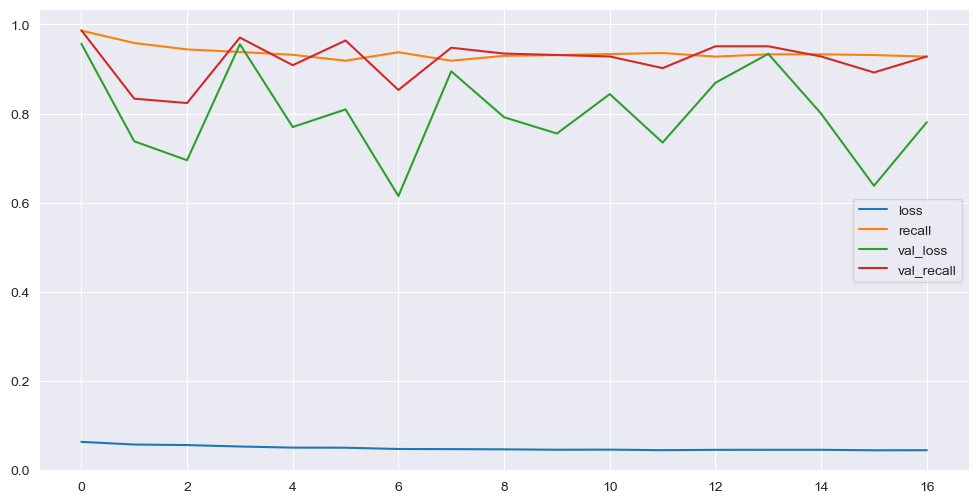

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[747 447]
 [ 45 261]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.75      1194
           1       0.37      0.85      0.51       306

    accuracy                           0.67      1500
   macro avg       0.66      0.74      0.63      1500
weighted avg       0.83      0.67      0.70      1500



In [ ]:
model.save('model_churn.h5')

### Prediction

In [ ]:
single_customer = df.drop('Exited', axis=1).iloc[[0]]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,customer_value
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.0,1,1,1,101348.9,3


In [ ]:
single_customer1 = single_customer.copy()
single_customer1["Geography"] = "Germany"
single_customer1["Age"] = 45
single_customer1["Balance"] = 250000

In [ ]:
single_customer1 = col_transformer.transform(single_customer1)
single_customer1

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 6.1900000e+02, 4.5000000e+01, 2.0000000e+00,
        2.5000000e+05, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05, 3.0000000e+00]])

In [ ]:
single_customer1 = scaler.transform(single_customer1)
single_customer1

array([[0.        , 1.        , 0.        , 1.        , 0.        ,
        0.538     , 0.36486486, 0.2       , 1.04871244, 0.        ,
        1.        , 1.        , 0.50673489, 0.5       ]])

In [ ]:
model.predict(single_customer1)

array([[0.75507927]], dtype=float32)

In [ ]:
(model.predict(single_customer1) > 0.5).astype("int32")

array([[1]])

---
---

## Comparison with ML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [ ]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced")
clf2 = SVC(probability=True, random_state=42, class_weight="balanced")
clf3 = LogisticRegression(random_state=42, class_weight="balanced")

In [ ]:
# Initilaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2 + i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2 + i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [ ]:
pipeline = Pipeline([('classifier', clf1)]) # pipeline to combine the classifiers
params = [param1, param2, param3] # list of dictionaries to tune the hyperparameters

In [ ]:
grid_model = RandomizedSearchCV(pipeline,
                                params,
                                cv=5,
                                n_jobs=-1,
                                scoring='recall').fit(X_train, y_train)

In [ ]:
grid_model.best_params_ # best parameters to get the best score

{'classifier__penalty': 'l2',
 'classifier__C': 10,
 'classifier': LogisticRegression(C=10, class_weight='balanced', random_state=42)}

In [ ]:
grid_model.best_score_ # best score according to the scoring function

0.6932634805350568

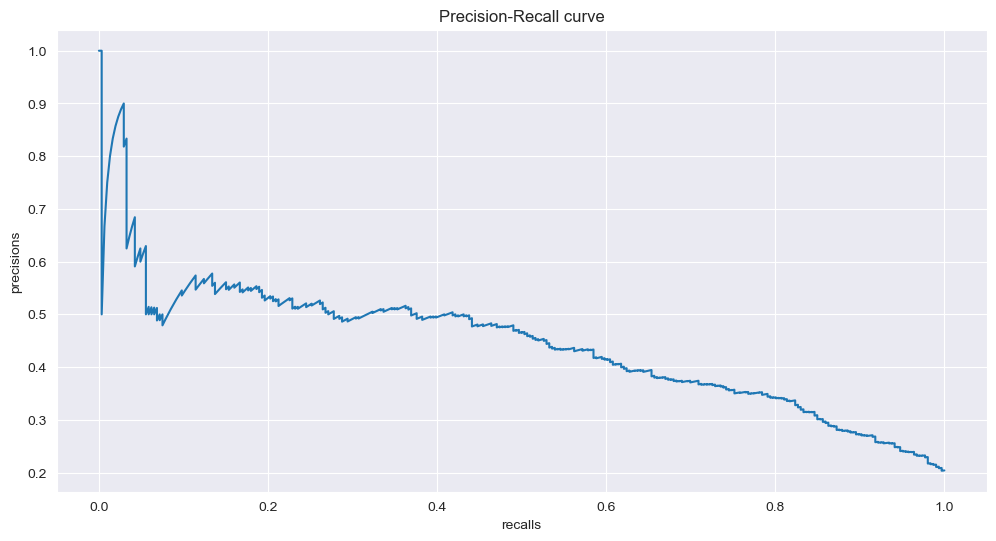

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.4444930049522347

In [ ]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[845 349]
 [ 98 208]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1194
           1       0.37      0.68      0.48       306

    accuracy                           0.70      1500
   macro avg       0.63      0.69      0.64      1500
weighted avg       0.79      0.70      0.73      1500



---
---